,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,57,1,0,150,276,0,0,112,1,0.6,1,1,1
1,2,59,1,3,170,288,0,0,159,0,0.2,1,0,3
2,3,57,1,2,150,126,1,1,173,0,0.2,2,1,3
3,4,56,0,0,134,409,0,0,150,1,1.9,1,2,3
4,5,71,0,2,110,265,1,0,130,0,0.0,2,1,2


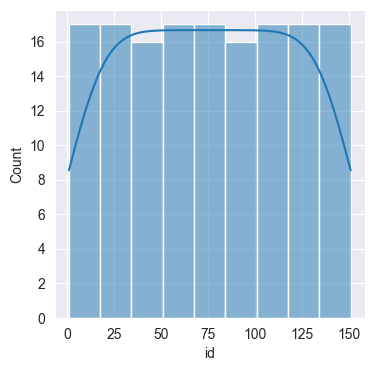

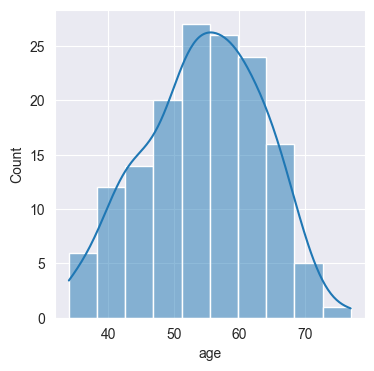

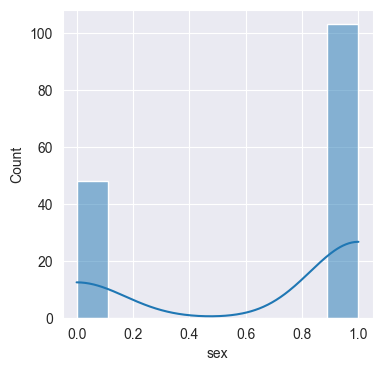

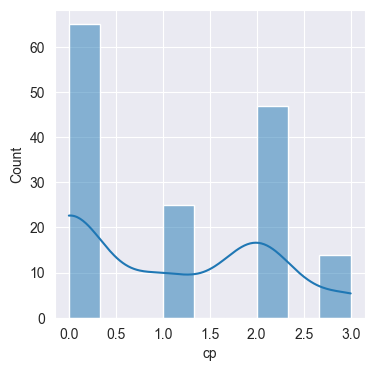

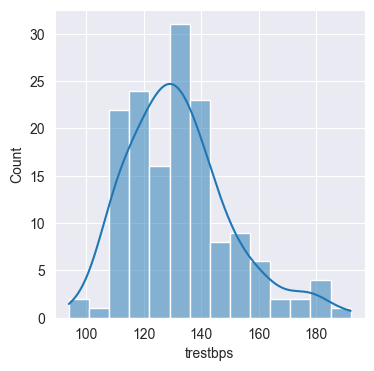

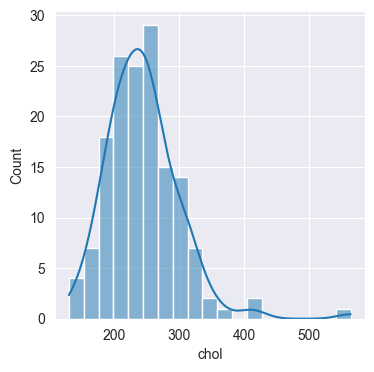

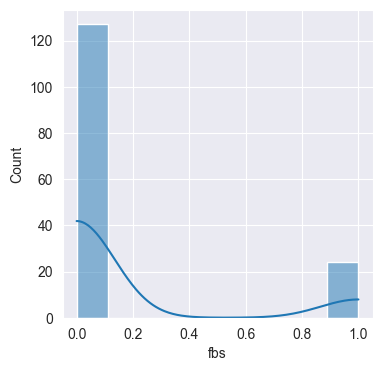

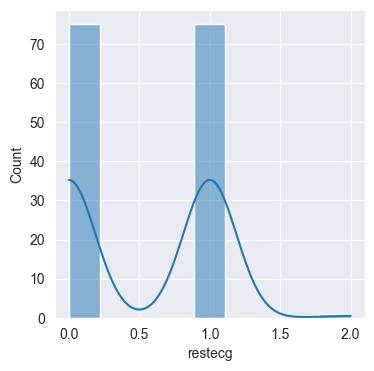

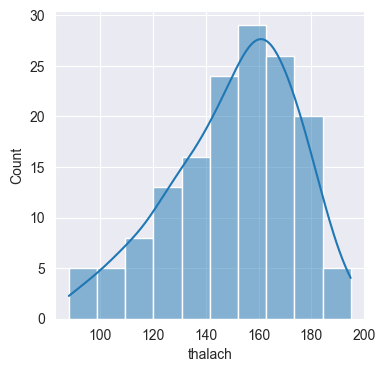

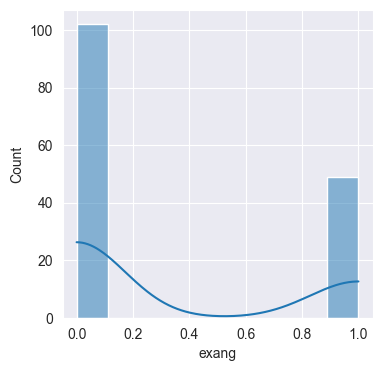

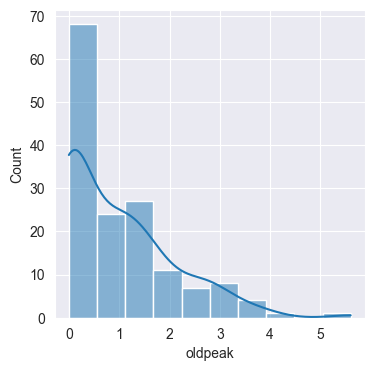

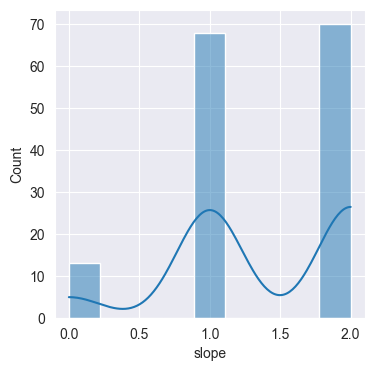

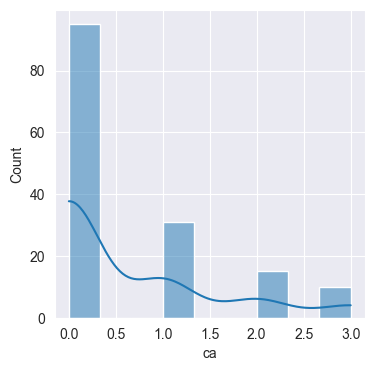

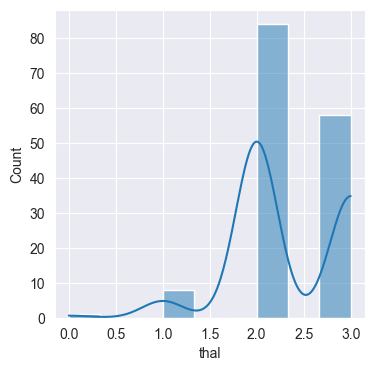

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
train.head()
train.shape
for column in train.columns[:-1]:
    plt.figure(figsize = (4, 4))
    sns.histplot(train[column], kde = True)
test.head()
# 수치형: age,trestbps, chol, thalach, oldpeak, ca
# 범주형: sex, cp, fbs, restecg, exang, slope, ca, thal

In [107]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
train_x = train.drop(columns=['id', 'target'])
train_y = train['target']
test_x = test.drop(columns=['id'])
scaler = StandardScaler()
train_x_scaled = train_x.copy()
test_x_scaled = test_x.copy()
train_x_scaled_only = train_x.copy()
test_x_scaled_only = test_x.copy()
train_x_scaled[numeric_features] = scaler.fit_transform(np.log(train_x.copy()[numeric_features] + 1e-9))
test_x_scaled[numeric_features] = scaler.transform(np.log(test_x.copy()[numeric_features] + 1e-9))
train_x_scaled_only[numeric_features] = scaler.fit_transform(train_x_scaled_only[numeric_features])
test_x_scaled_only[numeric_features] = scaler.transform(test_x_scaled_only[numeric_features])
train_x.head()
train_y.head()


0    1
1    1
2    0
3    1
4    1
Name: target, dtype: int64

In [112]:
# 변환 없이 모든 feature를 사용한 DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.1, random_state = 42)
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
f1_score(y_test, y_pred)

0.875

In [121]:
# 로그변환, 표준화 및 모든 feature를 사용한 DecisionTree
x_train, x_test, y_train, y_test = train_test_split(train_x_scaled, train_y, test_size = 0.1, random_state = 42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
f1_score(y_test, y_pred)

0.875

In [110]:
# 표준화 및 모든 feature를 사용한 Decision Tree
x_train, x_test, y_train, y_test = train_test_split(train_x_scaled_only, train_y, test_size = 0.2, random_state = 42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
f1_score(y_test, y_pred)

0.7647058823529411